In [ ]:
# import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
# Import dataset
df = pd.read_csv('Train.csv')

FileNotFoundError: ignored

Penjelasan dari setiap kolom :

- ID: ID Number of Customers.
- Warehouse block: Perusahaan memiliki Gudang besar yang terbagi dalam blok-blok seperti A,B,C,D,E.
- Mode of shipment:
Perusahaan Mengirimkan produk dalam berbagai cara seperti Kapal, Penerbangan, dan Jalan
- Customer care calls: Jumlah panggilan yang dilakukan dari penyelidikan untuk penyelidikan pengiriman.
- Customer rating: Perusahaan telah menilai dari setiap pelanggan. 1 adalah yang terendah (Terburuk), 5 adalah yang tertinggi (Terbaik).
- Cost of the product: Biaya Produk dalam Dolar AS.
- Prior purchases: Jumlah Pembelian Sebelumnya.
- Product importance: 
Perusahaan telah mengkategorikan produk dalam berbagai parameter seperti rendah, sedang, tinggi.
- Gender: Male and Female.
- Discount offered: 
Diskon yang ditawarkan untuk produk tertentu.
- Weight in gms:
Ini adalah berat dalam gram
- Reached on time: 
Ini adalah variabel target, di mana 1 Menunjukkan bahwa produk belum mencapai tepat waktu dan 0 menunjukkan telah mencapai tepat waktu.

# 1. Descriptive Statistics (15 poin)

Gunakan function info dan describe pada dataset final project kalian. Tuliskan hasil observasinya, seperti:

A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?

B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?

C. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq)

* Untuk masing-masing jenis observasi, tuliskan juga jika tidak ada masalah,
 misal untuk A: “Semua tipe data sudah sesuai”

In [ ]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [ ]:
df['Discount_offered'] = df['Discount_offered'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10999 non-null  int64  
 1   Warehouse_block      10999 non-null  object 
 2   Mode_of_Shipment     10999 non-null  object 
 3   Customer_care_calls  10999 non-null  int64  
 4   Customer_rating      10999 non-null  int64  
 5   Cost_of_the_Product  10999 non-null  int64  
 6   Prior_purchases      10999 non-null  int64  
 7   Product_importance   10999 non-null  object 
 8   Gender               10999 non-null  object 
 9   Discount_offered     10999 non-null  float64
 10  Weight_in_gms        10999 non-null  int64  
 11  Reached.on.Time_Y.N  10999 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 1.0+ MB


In [ ]:
df.nunique()

ID                     10999
Warehouse_block            5
Mode_of_Shipment           3
Customer_care_calls        6
Customer_rating            5
Cost_of_the_Product      215
Prior_purchases            8
Product_importance         3
Gender                     2
Discount_offered          65
Weight_in_gms           4034
Reached.on.Time_Y.N        2
dtype: int64

In [ ]:
num = df.select_dtypes(exclude='object')
cat_ord = df[['Product_importance','Mode_of_Shipment']]
cat_nom = df[['Gender', 'Warehouse_block']]

A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?
pada kolom Discount_offered kami mengubah tipe data dari int64 menjadi float 

B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?

Tidak ada, dapat dilihat pada output df.info() bahwa jumlah baris dari setiap kolom itu sama semua yaitu 10999 dan RangeIndex pada df.info() sudah memberikan informasi bahwa terdapat 10999 baris namun terdapat data yang sama/nunique pada dataset

C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq)

1. Pada kolom discount_offered minimal nilainya adalah 1 sehingga nilai std jauh lebih besar dibanding nilai mean 
2. nilai median lebih kecil dibanding dengan nilai mean sehingga memiliki distribusi positif

# 2. Univariate Analysis (25 poin) 

Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun
target). Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya
menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya
terlalu banyak, dsb). Jelaskan juga apa yang harus di-follow up saat data pre-processing.

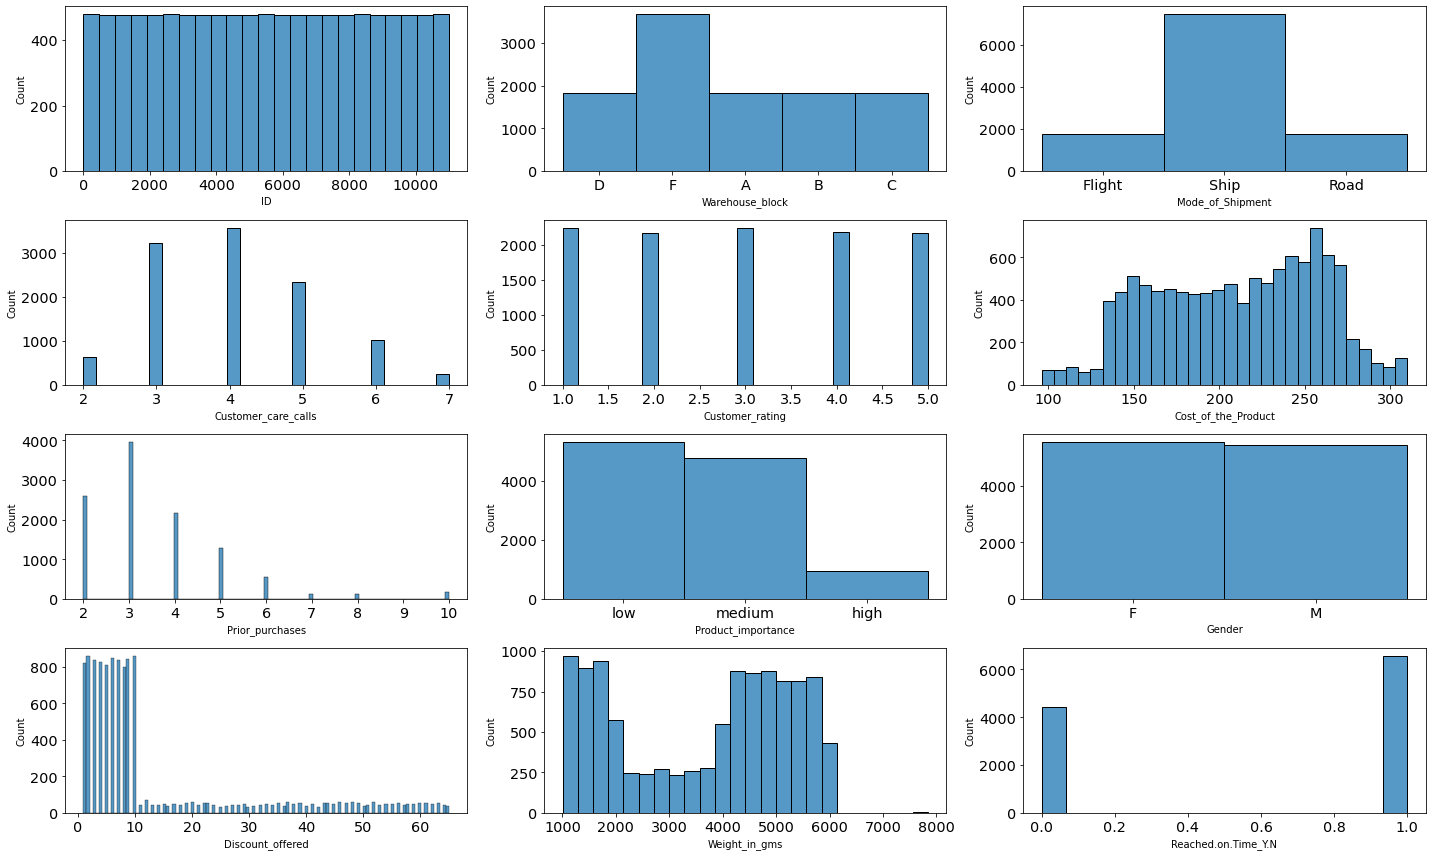

In [ ]:
plt.figure(figsize=(20,12))
for i, column in enumerate(df.columns, 1):
    plt.subplot(4,3,i)
    sns.histplot(df[column])
    plt.tight_layout()

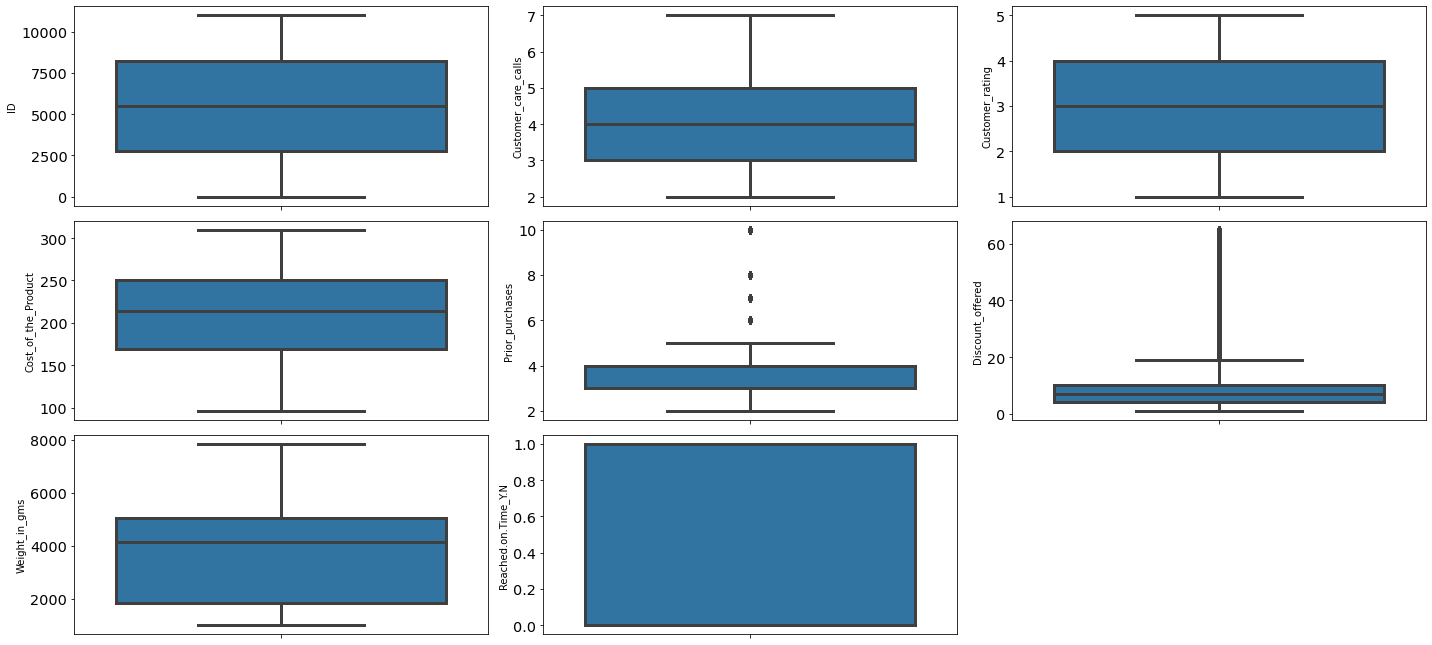

In [ ]:
plt.figure(figsize=(20,12))
nums = df.select_dtypes(exclude='object')
for i, column in enumerate(nums.columns, 1):
    plt.subplot(4,3,i)
    sns.boxplot(y = nums[column])
    plt.tight_layout()

In [ ]:
df1 = df.copy()

#Menambah kolom 'Customer_rating' berjenis kategorikal
df['Customer_Rating(cat)'] = np.where(df['Customer_rating']==1, 'Bintang 1',
                                      np.where(df['Customer_rating']==2, 'Bintang 2',
                                               np.where(df['Customer_rating']==3, 'Bintang 3',
                                                        np.where(df['Customer_rating']==4, 'Bintang 4', 'Bintang 5'))))

In [ ]:
#Menambah kolom 'Reached.on.Time_Y.N' berjenis kategorikal
df['Late_Shipment(cat)'] = np.where(df['Reached.on.Time_Y.N']==0, 'No', 'Yes')

In [ ]:
#Rename variabel lama (agar rapih dan seragam)
df = df.rename(columns = { 'Warehouse_block' : 'Warehouse_Block',
                          'Customer_care_calls' : 'Customer_Care_Calls',
                          'Customer_rating' : 'Customer_Rating(num)',
                          'Cost_of_the_Product' : 'Cost_of_The_Product',
                          'Prior_purchases' : 'Prior_Purchases',
                          'Product_importance' : 'Product_Importance',
                          'Discount_offered' : 'Discount_Offered',
                          'Reached.on.Time_Y.N' : 'Late_Shipment(num)'})

In [ ]:
#Pengelompokan kolom berdasarkan jenisnya
numerical = ['Customer_Care_Calls', 'Cost_of_The_Product', 'Prior_Purchases', 'Discount_Offered', 'Weight_in_gms', 'Customer_Rating(num)', 'Late_Shipment(num)']
categorical = ['Warehouse_Block', 'Mode_of_Shipment', 'Product_Importance', 'Gender', 'Customer_Rating(cat)', 'Late_Shipment(cat)']

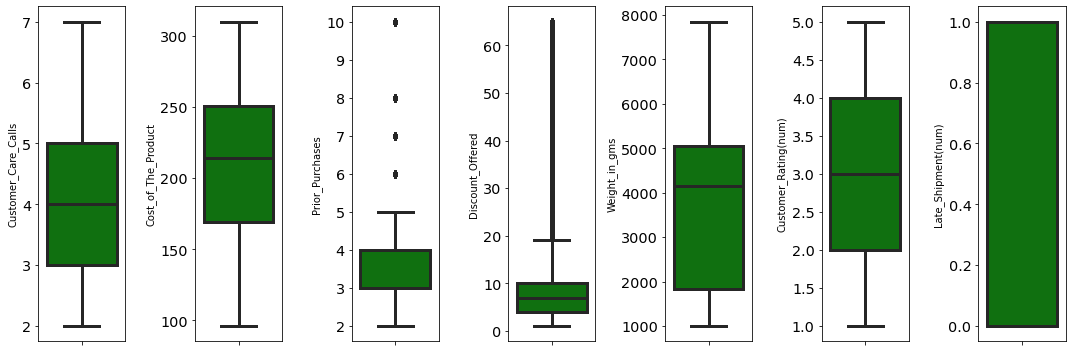

In [ ]:
features = numerical
plt.figure(figsize=(15,5))
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=df[features[i]], color='green', orient='v')
  plt.tight_layout()

- Customer care call pada boxplot menandakan bahwa pelanggan lebih banyak menelpon ke customer call 3 sampai 5 kali dan kolom customer care call ini tidak memiliki outlier 
- Persebaran data dari kolom Cost of the product pada boxplot berada di harga 180 hingga 250 dan cost of the product ini tidak memiliki outlier 
- Prior purchase pada boxplot pelanggan melakukan repeat order, kebanyakan 3 sampai 4 kali order dan di kolom prior purchase ini terdapat outlier yang cukup extreme di 10 kali order 
- Discount offered pada boxplot pelanggan lebih banyak mengambil discount 1% sampai dengan 10% dan di kolom discount offered ini memiliki outlier yang sangat banyak.
- Weight in gms pada boxplot berat paket kebanyakan berada di 1900 sampai 5000 dan kolom tersebut tidak memiliki outlier 
- Customer rating pada boxplot perusahaan menilai pelanggan kebanyakan di rating 2 sampai 4 dan pada kolom ini tidak memiliki outlier 
- Late shipment pada boxplot nya terlihat penuh dikarenakan lateshipment ini hanya ada 2 pilihan yaitu 0 dan 1 sehingga late shipment ini bisa dimasukan kedalam categorical

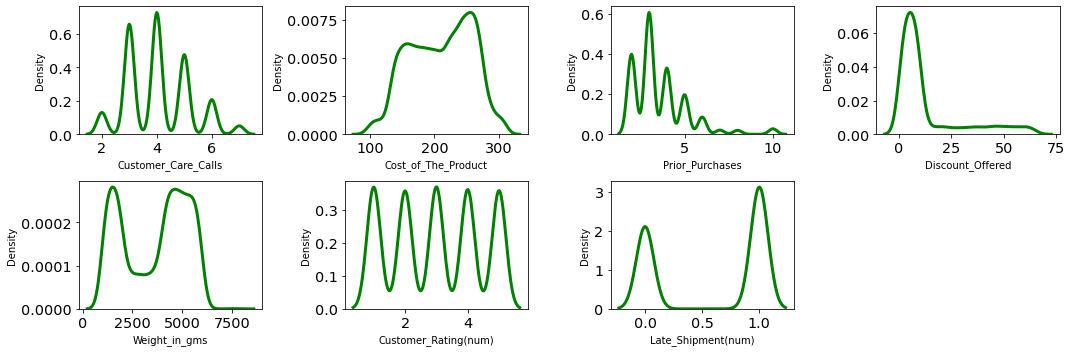

In [ ]:
features = numerical
plt.figure(figsize=(15, 5))
for i in range(0, len(features)):
  plt.subplot(2, 4, i+1)
  sns.kdeplot(x=df[features[i]], color='green')
  plt.xlabel(features[i])
  plt.tight_layout()

- Customer care call pada kdeplot kolom tersebut memiliki bentuk multimodal yang dimana kolom tersebut bisa dimasukan kedalam categorikal 
- Cost of the product pada kdeplot kolom tersebut memiliki bentuk hampir normal
- Prior purchase pada kdeplot kolom tersebut memiliki bentuk multimodal yang dimana kolom tersebut bisa dimasukan kedalam categorikal
- Discount offered pada kdeplot kolom tersebut memiliki bentuk positif skewed dimana nilai mean lebih kecil dari pada median hingga memiliki longtial yang panjang
- Weight in gms pada kdeplot kolom tersebut memiliki bentuk negative skewed  yang tidak sempurna dikarenakan tingginya lonjakan di angka 1900 membuat bentuk kolom tersebut seperti bimodal
- Customer rating pada kdeplot kolom tersebut memiliki bentuk multimodal yang dimana kolom tersebut bisa dimasukan kedalam categorikal
- Late shipment pada kdeplot kolom tersebut memiliki bentuk bimodal yang dimana kolom tersebut bisa dimasukan kedalam categorikal

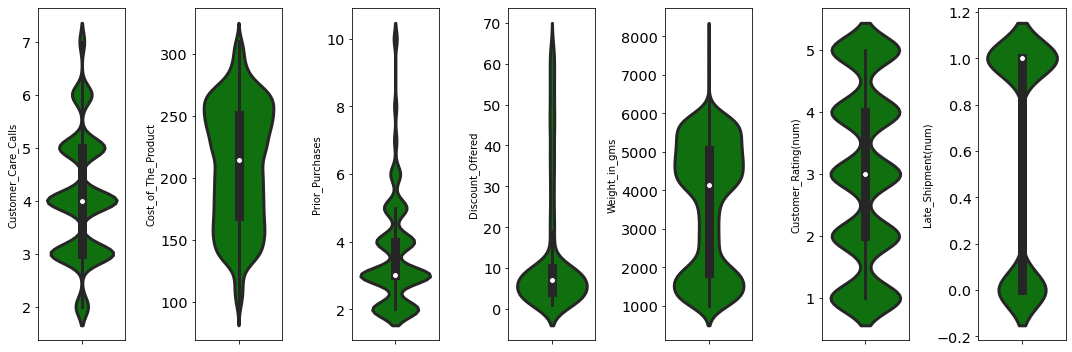

In [ ]:
plt.figure(figsize=(15,5))
for i in range(0, len(numerical)):
    plt.subplot(1, len(numerical), i+1)
    sns.violinplot(y=df[numerical[i]], color='green', orient='v')
    plt.tight_layout()

- Pada kolom customer_care_calss dapat dilihat kebanyakan pelanggan menelpon customer care sebanyak 4 kali.
- padak kolom cost of the product, harga barang yang dikirim paling banyak bernilai 260
- Pada kolom prior purchase persebaran data menumpuk di 3 sehingga barang dengan prior purchase 3 menjadi jumlah barang terbanyak
- pada kolom discount offered dapat dilihat bahwa diskon barang yang umum diberikan berada dibawah 15 persen.
- pada kolom weight_in_gms kebanyakan barang yang kita kirim berbobot berkisar 1000-2000 dan 4000-6000
- Persebaran rating yang diberikan customer dapat dibilang merata sehingga menurut kami e-commerce kita cukup buruk.
- Pada kolom late_shipment didapatkan informasi bahwa barang yang telat lebih banyak dibanding tepat waktu

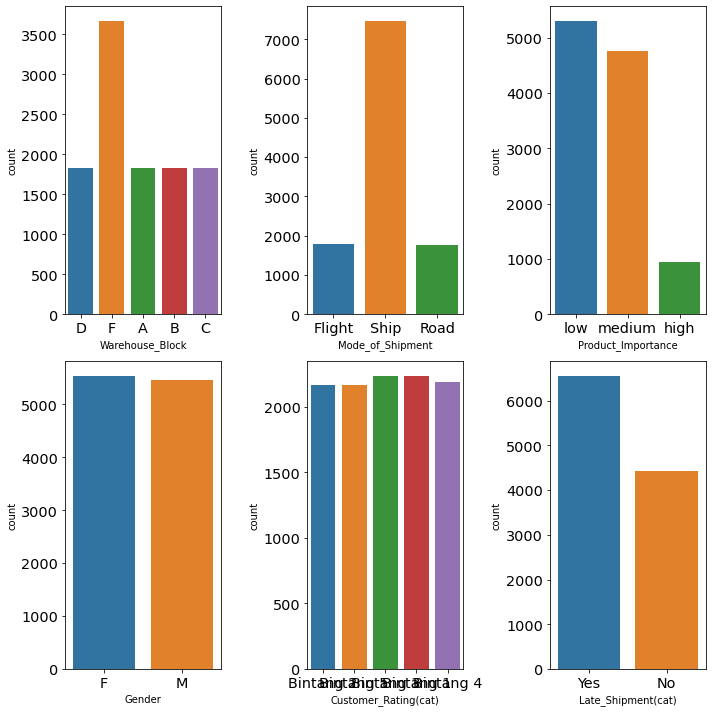

In [ ]:
plt.figure(figsize=(10,10))
for i in range(0, len(categorical)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df[categorical[i]], orient='v')
    plt.tight_layout()

- Warehouse block	pada countplot dapat dilihat bahwa warehouse F merupakan gudang dengan jumlah penyimpanan barang terbanyak dibanding warehouse di block lain seperti A, B, C dan D

- Mode_of_shipment pada countplot dapat dilihat bahwa Mode pengiriman menggunakan kapal menjadi mode pengiriman terbanyak, sementara mode menggunakan jalur darat dan udara memiliki nilai yang hampir sama

- Product_importance pada countplot dapat dilihat Pelanggan kebanyakan membeli tipe barang low priority, dan ada ketimpangan pada high priority

- Gender pada countplot dapat dilihat pelanggan paling banyak merupakan wanita namun perbandingannya tidak terlalu jauh dengan pria

- Reached_on_Time_Y.N	pada countplot dapat dilihat bahwa barang saat ini sering kali telat dibanding tepat waktu

- Customer Rating pada countplot dapat dilihat bahwa rating dari 1 hingga 5 perbandingannya tidak jauh berbeda hanya rating 3 lebih dominan dibandingkan rating yang lain

# 3. Multivariate Analysis (15 poin)
Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang diajarkan di kelas). Tuliskan hasil observasinya, seperti:

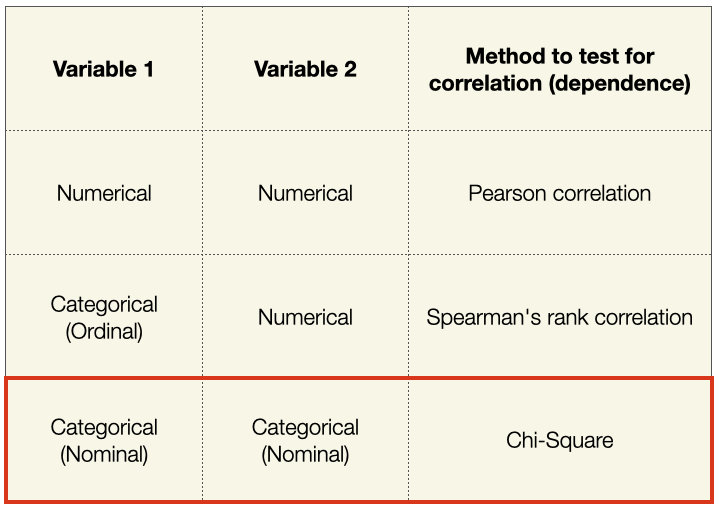



## A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?

In [ ]:
# Korelasi feature dengan label
def get_nonself_correlation(df,self_name):
    temp = df.select_dtypes(exclude=object).corr().abs()
    temp = temp.loc[temp.index!=self_name,temp.columns==self_name]
    temp = temp.unstack().reset_index()
    temp.columns = ['corr_matrix', 'dfbase', 'correlation'] 
    return temp

In [ ]:
a = get_nonself_correlation(df1, 'Reached.on.Time_Y.N').sort_values(by='correlation', ascending = False).reset_index()
a

,index,corr_matrix,dfbase,correlation
0,0,Reached.on.Time_Y.N,ID,0.411822
1,5,Reached.on.Time_Y.N,Discount_offered,0.397108
2,6,Reached.on.Time_Y.N,Weight_in_gms,0.268793
3,3,Reached.on.Time_Y.N,Cost_of_the_Product,0.073587
4,1,Reached.on.Time_Y.N,Customer_care_calls,0.067126
5,4,Reached.on.Time_Y.N,Prior_purchases,0.055515
6,2,Reached.on.Time_Y.N,Customer_rating,0.013119


Jika dilihat melalui program, maka kolom ID memiliki korelasi tertinggi dengan label, namun secara logika hal itu tidak mungkin karena ID hanya berupa indeks saja sehingga kolom ID untuk melatih model machine learning akan dihapus. sementara kolom lainnya akan digunakan walaupun memiliki korelasi yang tidak tinggi namun kami merasa kolom tersebut merupakan kolom-kolom yang menjadi penentu apakah barang tersebut telat atau tidak.

In [ ]:
df1 = df.copy()
# mengambil kolom dengan tipe data non numeric
cat = df1.select_dtypes(include=object)

# mengubah tipe data object to numeric
cat = cat.apply(lambda x: x.factorize()[0])

cat['Reached.on.Time_Y.N'] = df1['Reached.on.Time_Y.N']

# sumber : https://stackoverflow.com/questions/47002168/correlation-between-two-non-numeric-columns-in-a-pandas-dataframe

In [ ]:
a = get_nonself_correlation(cat, 'Reached.on.Time_Y.N').sort_values(by='correlation', ascending = False).reset_index()
a

,index,corr_matrix,dfbase,correlation
0,2,Reached.on.Time_Y.N,Product_importance,0.020517
1,1,Reached.on.Time_Y.N,Mode_of_Shipment,0.007797
2,3,Reached.on.Time_Y.N,Gender,0.004689
3,0,Reached.on.Time_Y.N,Warehouse_block,0.000128


Jika dilihat korelasi tipe data object dengan label, nilainya pun juga rendah, namun kami menyakini bahwa product_importance dan mode_of_shipment mempengaruhi apakah barang akan telat sampai ke customer atau tidak, untuk kolom gender dan warehouse_block akan kita cek terlebih dahulu apakah cukup berpengaruh atau tidak.

In [ ]:
# melihat hubungan kolom gender dengan kolom 'Reached.on.Time_Y.N'
grp1 = df1.groupby(['Gender', 'Reached.on.Time_Y.N'])['ID'].count().reset_index()

total_customer_nonsc = grp1['ID'][grp1['Reached.on.Time_Y.N'] == 0].sum()
total_customer_sc = grp1['ID'][grp1['Reached.on.Time_Y.N'] == 1].sum()
percentage = []

for i,v in enumerate(grp1['ID']):
    if grp1['Reached.on.Time_Y.N'][i] == 0:
        pct = (v /total_customer_nonsc) * 100
    else:
        pct = (v / total_customer_sc) * 100
    percentage.append(round(pct, 1))

grp1['Persentase_pertipe_sz'] = percentage

grp1.sort_values(by='Reached.on.Time_Y.N')

,Gender,Reached.on.Time_Y.N,ID,Persentase_pertipe_sz
0,F,0,2249,50.7
2,M,0,2187,49.3
1,F,1,3296,50.2
3,M,1,3267,49.8


Dapat dilihat bahwa gender tidak mempengaruhi apakah barang telat atau tidak dikarenakan dapat dilihat bahwa untuk barang yang telat 50,2 persen dari customer perempuan dan 49,8 dari customer laki-laki, perbedaannya tidak signifikan sehingga untuk pembuatan model kolom gender sebaiknya dihapus

In [ ]:
# melihat hubungan kolom warehouse_block dengan kolom 'Reached.on.Time_Y.N'
grp2 = df1.groupby(['Warehouse_block', 'Reached.on.Time_Y.N'])['ID'].count().reset_index()

total_customer_nonsc = grp2['ID'][grp2['Reached.on.Time_Y.N'] == 0].sum()
total_customer_sc = grp2['ID'][grp2['Reached.on.Time_Y.N'] == 1].sum()
percentage = []

for i,v in enumerate(grp2['ID']):
    if grp2['Reached.on.Time_Y.N'][i] == 0:
        pct = (v /total_customer_nonsc) * 100
    else:
        pct = (v / total_customer_sc) * 100
    percentage.append(round(pct, 1))

grp2['Persentase_pertipe_sz'] = percentage

grp2.sort_values(by='Reached.on.Time_Y.N')

,Warehouse_block,Reached.on.Time_Y.N,ID,Persentase_pertipe_sz
0,A,0,758,17.1
2,B,0,729,16.4
4,C,0,739,16.7
6,D,0,738,16.6
8,F,0,1472,33.2
1,A,1,1075,16.4
3,B,1,1104,16.8
5,C,1,1094,16.7
7,D,1,1096,16.7
9,F,1,2194,33.4


Dapat dilihat bahwa warehouse blok F memiliki persentase tertinggi untuk barang yang telat dan tidak telat yaitu berkisar 33% sehingga bla bla bla (aku bingung wkwkwk)

## B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?
* Tuliskan juga jika memang tidak ada feature yang saling berkorelasi

In [ ]:
from sklearn.feature_selection import chi2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df = pd.read_csv('Train.csv')
df2 = df.drop(['Discount_offered', 'Weight_in_gms', 'Cost_of_the_Product'], axis=1)
cat = df2.select_dtypes(include=object)

# mengubah tipe data object to numeric
cat = cat.apply(lambda x: x.factorize()[0])
cat_column = cat.columns

df2[cat_column] = cat

# Resultant Dataframe will be a dataframe where the column names and Index will be the same
# This is a matrix similar to correlation matrix which we get after df.corr()
# Initialize the values in this matrix with 0

resultant = pd.DataFrame(data=[(0 for i in range(len(df2.columns))) for i in range(len(df2.columns))], 
                         columns=list(df2.columns))
resultant.set_index(pd.Index(list(df2.columns)), inplace = True)

# Finding p_value for all columns and putting them in the resultant matrix
for i in list(df2.columns):
    for j in list(df2.columns):
        if i != j:
            chi2_val, p_val = chi2(np.array(df2[i]).reshape(-1, 1), np.array(df2[j]).reshape(-1, 1))
            resultant.loc[i,j] = p_val
print(resultant)

                           ID  Warehouse_block  Mode_of_Shipment  \
ID                   0.000000         0.955390      1.072302e-96   
Warehouse_block      0.865549         0.000000      9.930380e-01   
Mode_of_Shipment     1.000000         0.999997      0.000000e+00   
Customer_care_calls  1.000000         0.897005      4.805236e-01   
Customer_rating      1.000000         0.869592      9.736032e-01   
Prior_purchases      1.000000         0.883613      9.459007e-01   
Product_importance   1.000000         0.880656      6.528936e-01   
Gender               1.000000         0.981193      3.987277e-01   
Reached.on.Time_Y.N  1.000000         0.979129      8.607792e-01   

                     Customer_care_calls  Customer_rating  Prior_purchases  \
ID                          0.000000e+00         0.000000     0.000000e+00   
Warehouse_block             5.132279e-01         0.744098     8.735712e-01   
Mode_of_Shipment            8.899410e-01         0.995367     8.833701e-01   
Custome

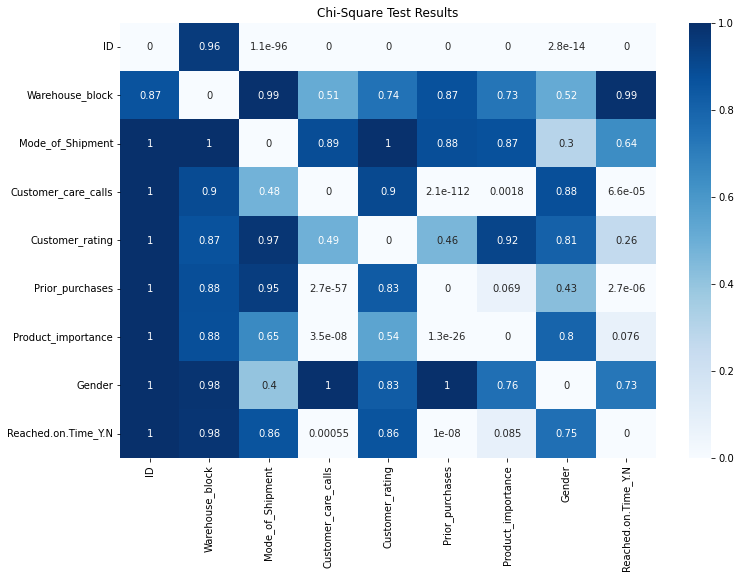

In [ ]:
# Plotting a heatmap
fig = plt.figure(figsize=(12,8))
sns.heatmap(resultant, annot=True, cmap='Blues')
plt.title('Chi-Square Test Results')
plt.show()

In [ ]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df = pd.read_csv('Train.csv')
df2 = df.drop(['Discount_offered', 'Weight_in_gms', 'Cost_of_the_Product'], axis=1)
cat = df2.select_dtypes(include=object)

# mengubah tipe data object to numeric
cat = cat.apply(lambda x: x.factorize()[0])
cat_column = cat.columns

df2[cat_column] = cat

# Resultant Dataframe will be a dataframe where the column names and Index will be the same
# This is a matrix similar to correlation matrix which we get after df.corr()
# Initialize the values in this matrix with 0
resultant = pd.DataFrame(data=[(0 for i in range(len(df2.columns))) for i in range(len(df2.columns))], 
                         columns=list(df2.columns))
resultant.set_index(pd.Index(list(df2.columns)), inplace = True)

# Finding p_value for all columns and putting them in the resultant matrix
for i in list(df2.columns):
    for j in list(df2.columns):
        if i != j:
            kruskal_val, p_val = stats.kruskal(df2[i], df2[j])
            resultant.loc[i,j] = p_val
print(resultant)

                     ID  Warehouse_block  Mode_of_Shipment  \
ID                    0                0                 0   
Warehouse_block       0                0                 0   
Mode_of_Shipment      0                0                 0   
Customer_care_calls   0                0                 0   
Customer_rating       0                0                 0   
Prior_purchases       0                0                 0   
Product_importance    0                0                 0   
Gender                0                0                 0   
Reached.on.Time_Y.N   0                0                 0   

                     Customer_care_calls  Customer_rating  Prior_purchases  \
ID                          0.000000e+00     0.000000e+00     0.000000e+00   
Warehouse_block             0.000000e+00     0.000000e+00     0.000000e+00   
Mode_of_Shipment            0.000000e+00     0.000000e+00     0.000000e+00   
Customer_care_calls         0.000000e+00     0.000000e+00    1.2691

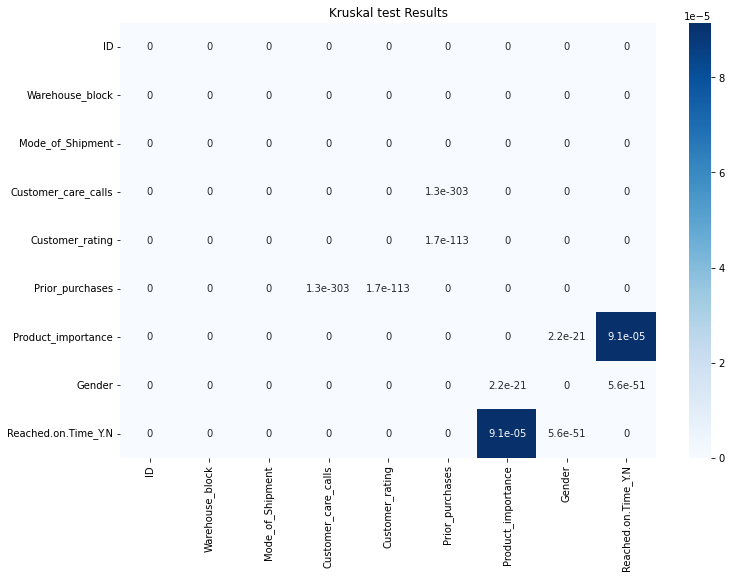

In [ ]:
# Plotting a heatmap
fig = plt.figure(figsize=(12,8))
sns.heatmap(resultant, annot=True, cmap='Blues')
plt.title('Kruskal test Results')
plt.show()

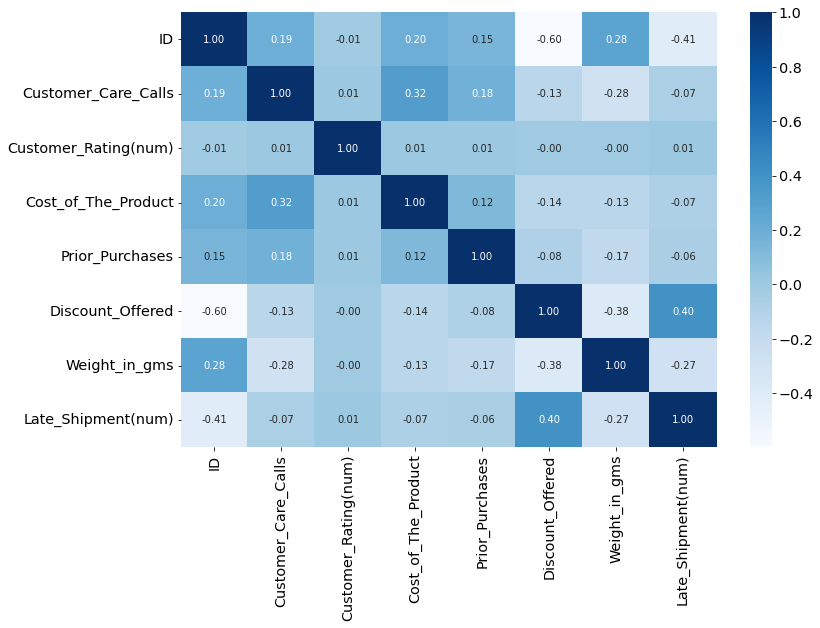

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

jika melihat heatmap diatas bahwa korelasi antar antar feauture tidak ada yang memiliki korelasi diatas 0,8 artinya tidak ada yang memiliki hubungan yang kuat namun sebaliknya ada beberapa feature yang tidak memilki korelasi yaitu 0

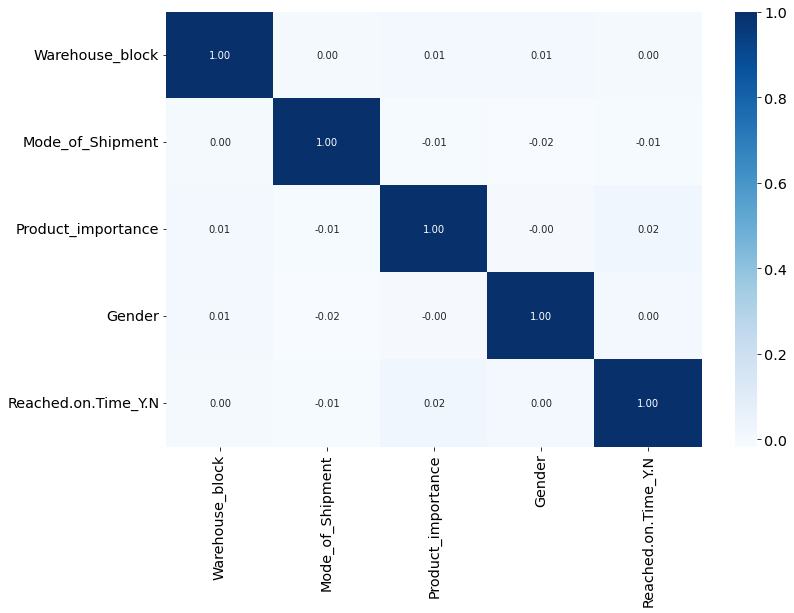

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(cat.corr(), cmap='Blues', annot=True, fmt='.2f')

# 3. Multivariate analysis (15 poin)

Untuk menjawab pertanyaan A dan B, mari simak analisis berikut.

### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import kendalltau
import plotly.express as px

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

### Import Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Train.csv to Train (1).csv


In [ ]:
df= pd.read_csv('Train.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


### Merubah Customer Care Calls, Customer Rating, Prior Purchases, dan Late Shipment menjadi Tipe Data Categorical

In [ ]:
df['Customer_care_calls(cat)'] = np.where(df['Customer_care_calls']==1, 'Satu',
                                      np.where(df['Customer_care_calls']==2, 'Dua',
                                               np.where(df['Customer_care_calls']==3, 'Tiga',
                                                        np.where(df['Customer_care_calls']==4, 'Empat',
                                                                 np.where(df['Customer_care_calls']==5, 'Lima',
                                                                          np.where(df['Customer_care_calls']==6, 'Enam', 'Tujuh'))))))

In [ ]:
df['Customer_rating(cat)'] = np.where(df['Customer_rating']==1, 'Bintang 1',
                                      np.where(df['Customer_rating']==2, 'Bintang 2',
                                               np.where(df['Customer_rating']==3, 'Bintang 3',
                                                        np.where(df['Customer_rating']==4, 'Bintang 4', 'Bintang 5'))))

In [ ]:
df['Prior_purchases(cat)'] = np.where(df['Prior_purchases']==1, 'Satu',
                                      np.where(df['Prior_purchases']==2, 'Dua',
                                               np.where(df['Prior_purchases']==3, 'Tiga',
                                                        np.where(df['Prior_purchases']==4, 'Empat',
                                                                 np.where(df['Prior_purchases']==5, 'Lima',
                                                                          np.where(df['Prior_purchases']==6, 'Enam',
                                                                                    np.where(df['Prior_purchases']==7, 'Tujuh',
                                                                                             np.where(df['Prior_purchases']==8, 'Delapan',
                                                                                                      np.where(df['Prior_purchases']==9, 'Sembilan','Sepuluh')))))))))

In [ ]:
df['Late_shipment(cat)'] = np.where(df['Reached.on.Time_Y.N']==0, 'No', 'Yes')

In [ ]:
df = df.rename(columns = { 'Customer_care_calls' : 'Customer_care_calls(num)',
                          'Cost_of_the_Product': 'Cost_of_the_product',
                          'Mode_of_Shipment': 'Mode_of_shipment',
                          'Customer_rating' : 'Customer_rating(num)',
                          'Prior_purchases' : 'Prior_purchases(num)',
                          'Reached.on.Time_Y.N' : 'Late_shipment(num)'})

In [ ]:
df.head()

,ID,Warehouse_block,Mode_of_shipment,Customer_care_calls(num),Customer_rating(num),Cost_of_the_product,Prior_purchases(num),Product_importance,Gender,Discount_offered,Weight_in_gms,Late_shipment(num),Customer_care_calls(cat),Customer_rating(cat),Prior_purchases(cat),Late_shipment(cat)
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,Empat,Bintang 2,Tiga,Yes
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,Empat,Bintang 5,Dua,Yes
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,Dua,Bintang 2,Empat,Yes
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,Tiga,Bintang 3,Empat,Yes
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,Dua,Bintang 2,Tiga,Yes


In [ ]:
#Pengelompokan kolom berdasarkan jenisnya
numerical = ['Customer_care_calls(num)', 'Customer_rating(num)', 'Cost_of_the_product', 'Prior_purchases(num)', 'Discount_offered', 'Weight_in_gms', 'Late_shipment(num)']
categorical = ['Warehouse_block', 'Mode_of_shipment', 'Product_importance', 'Gender', 'Customer_care_calls(cat)', 'Customer_rating(cat)', 'Prior_purchases(cat)', 'Late_Shipment(cat)']

In [ ]:
df1 = df.drop(['ID'], axis=1)
df1.head()

,Warehouse_block,Mode_of_shipment,Customer_care_calls(num),Customer_rating(num),Cost_of_the_product,Prior_purchases(num),Product_importance,Gender,Discount_offered,Weight_in_gms,Late_shipment(num),Customer_care_calls(cat),Customer_rating(cat),Prior_purchases(cat),Late_shipment(cat)
0,D,Flight,4,2,177,3,low,F,44,1233,1,Empat,Bintang 2,Tiga,Yes
1,F,Flight,4,5,216,2,low,M,59,3088,1,Empat,Bintang 5,Dua,Yes
2,A,Flight,2,2,183,4,low,M,48,3374,1,Dua,Bintang 2,Empat,Yes
3,B,Flight,3,3,176,4,medium,M,10,1177,1,Tiga,Bintang 3,Empat,Yes
4,C,Flight,2,2,184,3,medium,F,46,2484,1,Dua,Bintang 2,Tiga,Yes


## A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?

In [ ]:
dfcorr = df.drop(['ID'], axis=1)

In [ ]:
dfcorr1 = df.drop(['ID', 'Cost_of_the_product', 'Weight_in_gms'], axis=1)

### Correlation Heatmap

In [ ]:
dfcorr.corr()

,Customer_care_calls(num),Customer_rating(num),Cost_of_the_product,Prior_purchases(num),Discount_offered,Weight_in_gms,Late_shipment(num)
Customer_care_calls(num),1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
Customer_rating(num),0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
Cost_of_the_product,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
Prior_purchases(num),0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
Discount_offered,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
Weight_in_gms,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
Late_shipment(num),-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


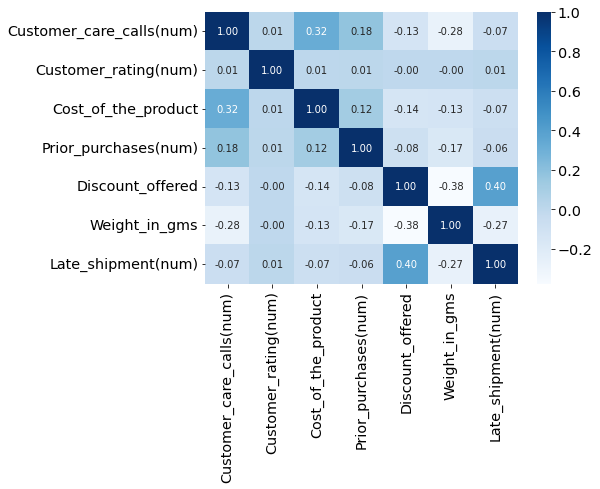

In [ ]:
plt.figure(figsize=(7, 5))
sns.heatmap(dfcorr.corr(), cmap='Blues', annot=True, fmt='.2f')

### Kendall

In [ ]:
corr = dfcorr1.corr(method='kendall')

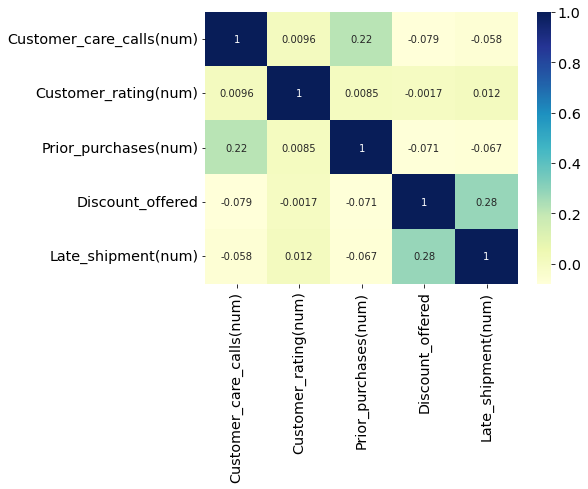

In [ ]:
rcParams['figure.figsize'] = 7,5
sns.heatmap(corr, 
           xticklabels=corr.columns.values, 
           yticklabels=corr.columns.values, 
           cmap="YlGnBu",
          annot=True)

### Kesimpulan

Hasil berdasarkan metode heatmap dan kendall tau:
- Daftar fitur yang berkorelasi positif dengan `Late_shipment(num)`= `Customer_rating(num)` dan `Discount_offered`.
- Daftar fitur yang berkorelasi negatif dengan `Late_shipment(num)`=  `Customer_care_calls`, `Cost_of_the_product`, `Prior_purchases`, dan `Weight_in_gms`
- Dua fitur terkuat untuk dipasangkan dengan `Late_shipment(num)`, yaitu `Discount_offered` dan `Weight_in_gms`.
- Berdasarkan metode heatmap dan kendall tau, `Late_shipment(num)` dengan `Discount_offered` memiliki korelasi positif. Semakin tinggi diskon yang ditawarkan pada suatu produk, maka semakin tinggi potensi pengirimannya mengalami keterlambatan. 
- Berdasarkan metode heatmap,`Late_shipment(num)` dengan `Weight_in_gms` memiliki korelasi negatif. Semakin ringan suatu produk, maka semakin tinggi potensi pengirimannya mengalami keterlambatan.
- Berdasarkan metode heatmap, tidak ditemukan fitur yang berkorelasi kuat dengan nilai di atas 0.7. Meskipun demikian, dua fitur yang berkorelasi mendekati kuat untuk dipasangkan dengan `Late_shipment(num)`, yaitu `Discount_offered` dan `Weight_in_gms`.
- Berdasarkan metode kendall tau, fitur dengan korelasi terkuat untuk dipasangkan dengan `Late_shipment(num)` adalah `Discount_offered`. Meskipun demikian, nilai tersebut masih jauh mendekati satu.

Pendapat Tambahan:
- Penggunaan heatmap kurang cocok dipakai dalam kasus ini karena sifat `Late_shipsment(num)` yang sebenarnya adalah tipe data kategori.

## B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?

### Pair Plots (Hue + Numeric)

<Figure size 720x720 with 0 Axes>

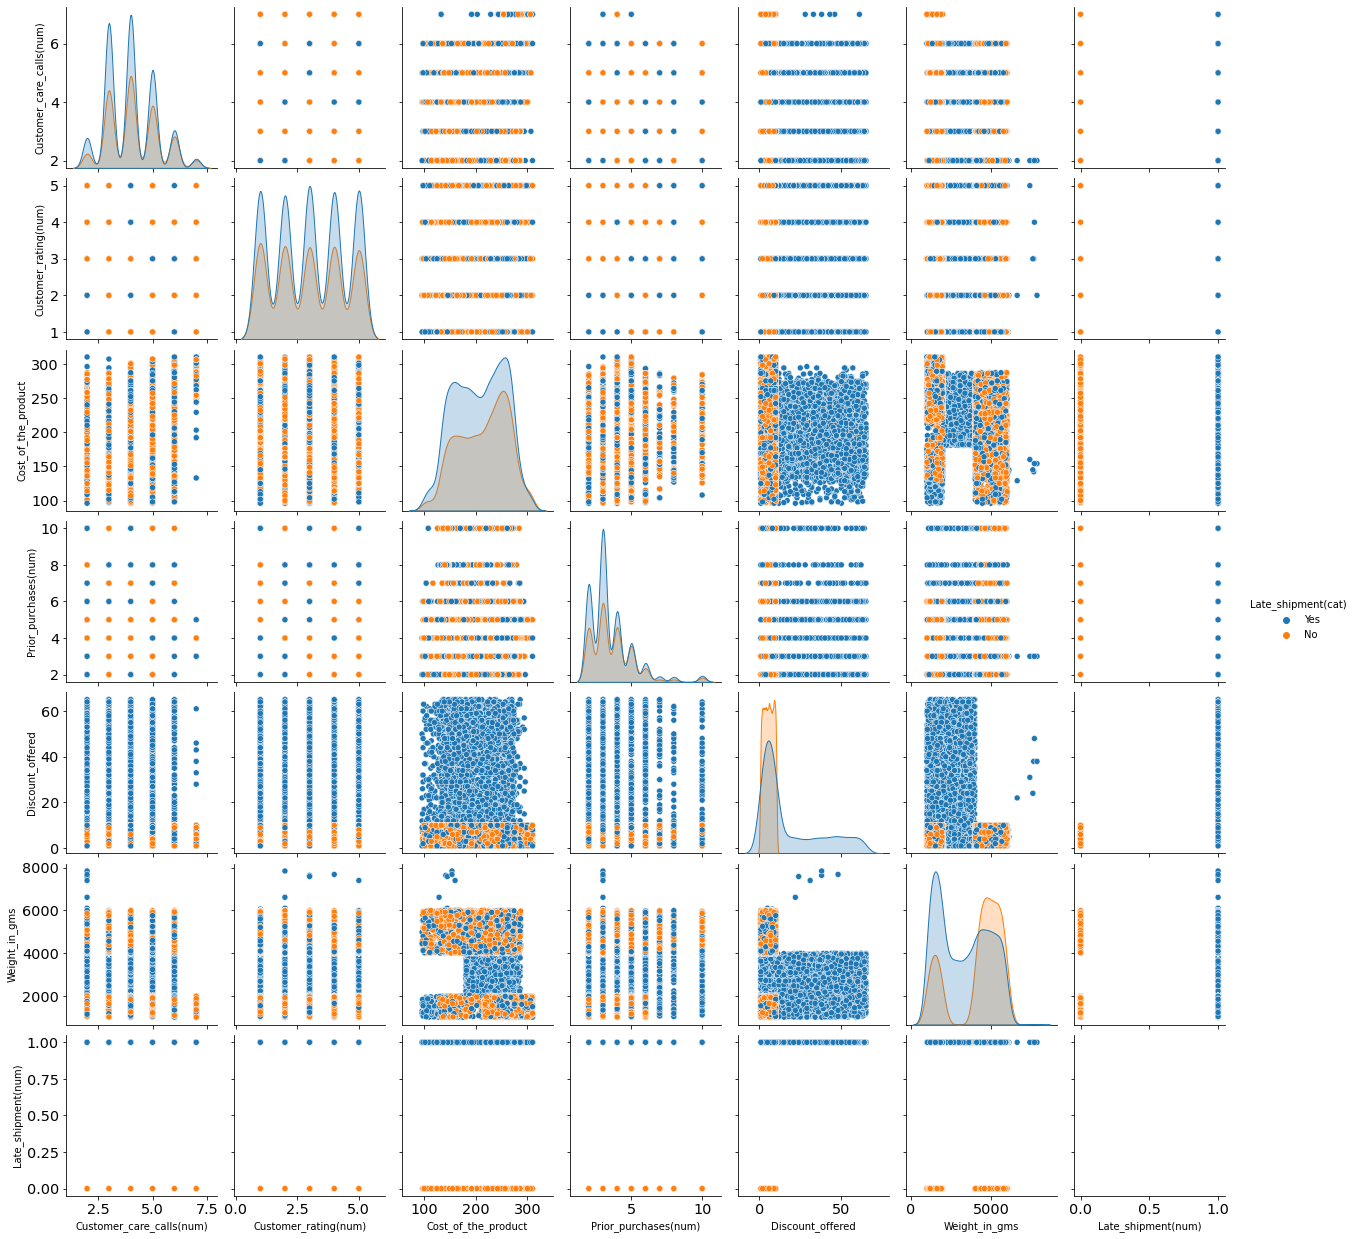

In [ ]:
plt.figure(figsize=(10, 10))
sns.pairplot(dfcorr, diag_kind='kde', hue='Late_shipment(cat)')

### Categorical VS Numerical

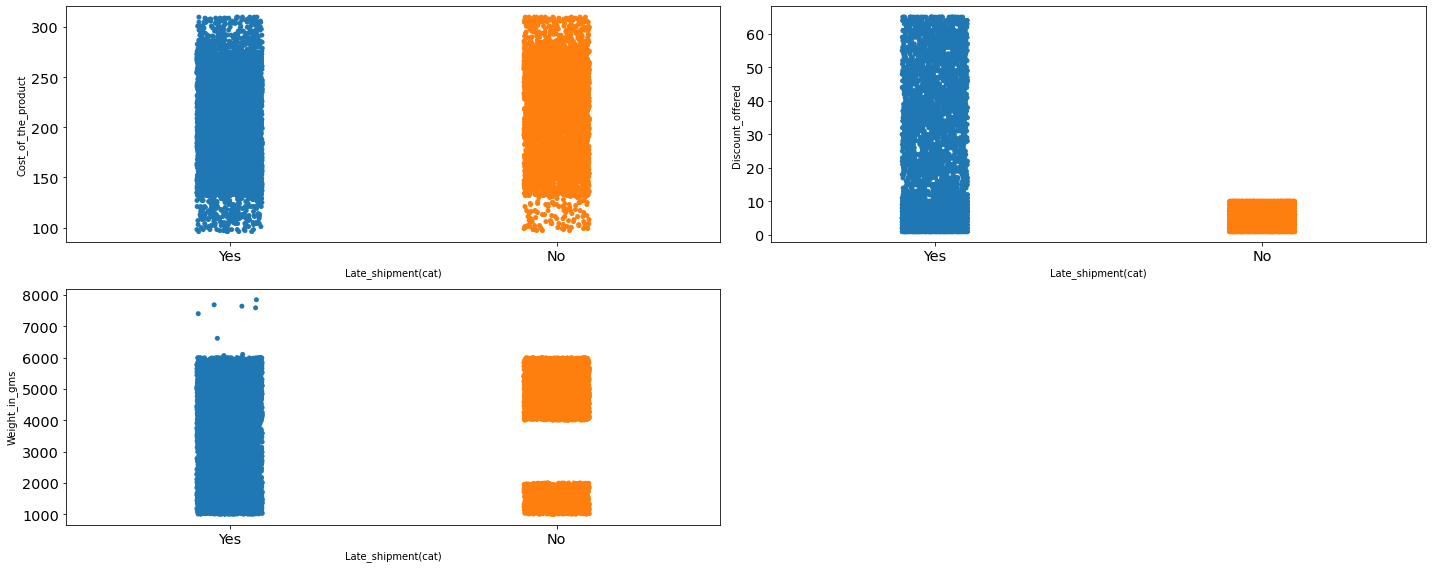

In [ ]:
numerical1 = ['Cost_of_the_product', 'Discount_offered', 'Weight_in_gms']
fig = plt.figure(figsize=(20, 8))
for i in range (0, len(numerical1)):
    ax = fig.add_subplot(2, 2, i+1)
    sns.stripplot(ax=ax, data=dfcorr, x='Late_shipment(cat)', y=numerical1[i])
    plt.tight_layout()
## Asummsi: 'Discount_offered' dianggap data numerical

### Kesimpulan

- Scatter plot dimana kedua warna dapat terpisah dengan baik dan memiliki pola yang jelas sehingga menarik untuk diperhatikan terletak pada kombinasi variabel `Late_shipment(num)` dengan `Discount_offered` dan `Weight_in_gms`. 
- `Discount_Offered` lebih dari 10% mengalami keterlambatan. Hipotesis: Diskon produk di atas 10% mengakibatkan tingginya pembelian dan pengiriman suatu produk, sedangkan kuota pengiriman barang tidak berubah sehingga pengiriman mengalami keterlambatan. Kasus semacam ini disebut dengan overload. Hal ini sering dialami oleh berbagai ekspedisi di dunia.
- `Weight_in_gms` direntang masa 2000 - 4000 gram mengalami keterlambatan.

## Multivariate Analysis (Tambahan)

In [ ]:
# Korelasi feature dengan label
def get_nonself_correlation(df,self_name):
    temp = df.select_dtypes(exclude=object).corr().abs()
    temp = temp.loc[temp.index!=self_name,temp.columns==self_name]
    temp = temp.unstack().reset_index()
    temp.columns = ['corr_matrix', 'dfbase', 'correlation'] 
    return temp

In [ ]:
a = get_nonself_correlation(df, 'Late_shipment(num)').sort_values(by='correlation', ascending = False).reset_index()
a

,index,corr_matrix,dfbase,correlation
0,0,Late_shipment(num),ID,0.411822
1,5,Late_shipment(num),Discount_offered,0.397108
2,6,Late_shipment(num),Weight_in_gms,0.268793
3,3,Late_shipment(num),Cost_of_the_product,0.073587
4,1,Late_shipment(num),Customer_care_calls(num),0.067126
5,4,Late_shipment(num),Prior_purchases(num),0.055515
6,2,Late_shipment(num),Customer_rating(num),0.013119


Jika dilihat melalui program, maka kolom ID memiliki korelasi tertinggi dengan label, namun secara logika hal itu tidak mungkin karena ID hanya berupa indeks saja sehingga kolom ID untuk melatih model machine learning akan dihapus. sementara kolom lainnya akan digunakan walaupun memiliki korelasi yang tidak tinggi namun kami merasa kolom tersebut merupakan kolom-kolom yang menjadi penentu apakah barang tersebut telat atau tidak.

In [ ]:
df = df.copy()
# mengambil kolom dengan tipe data non numeric
cat = df.select_dtypes(include=object)

# mengubah tipe data object to numeric
cat = cat.apply(lambda x: x.factorize()[0])

cat['Late_shipment(num)'] = df['Late_shipment(num)']

# sumber : https://stackoverflow.com/questions/47002168/correlation-between-two-non-numeric-columns-in-a-pandas-dataframe

In [ ]:
a = get_nonself_correlation(cat, 'Late_shipment(num)').sort_values(by='correlation', ascending = False).reset_index()
a

,index,corr_matrix,dfbase,correlation
0,7,Late_shipment(num),Late_shipment(cat),1.000000
1,6,Late_shipment(num),Prior_purchases(cat),0.074353
2,4,Late_shipment(num),Customer_care_calls(cat),0.037806
3,2,Late_shipment(num),Product_importance,0.020517
4,1,Late_shipment(num),Mode_of_shipment,0.007797
5,3,Late_shipment(num),Gender,0.004689
6,5,Late_shipment(num),Customer_rating(cat),0.001425
7,0,Late_shipment(num),Warehouse_block,0.000128


Jika dilihat korelasi tipe data object dengan label, nilainya pun juga rendah, namun kami menyakini bahwa product_importance dan mode_of_shipment mempengaruhi apakah barang akan telat sampai ke customer atau tidak, untuk kolom gender dan warehouse_block akan kita cek terlebih dahulu apakah cukup berpengaruh atau tidak.

In [ ]:
# melihat hubungan kolom gender dengan kolom 'Reached.on.Time_Y.N'
grp1 = df.groupby(['Gender', 'Late_shipment(num)'])['ID'].count().reset_index()

total_customer_nonsc = grp1['ID'][grp1['Late_shipment(num)'] == 0].sum()
total_customer_sc = grp1['ID'][grp1['Late_shipment(num)'] == 1].sum()
percentage = []

for i,v in enumerate(grp1['ID']):
    if grp1['Late_shipment(num)'][i] == 0:
        pct = (v /total_customer_nonsc) * 100
    else:
        pct = (v / total_customer_sc) * 100
    percentage.append(round(pct, 1))

grp1['Persentase_pertipe_sz'] = percentage

grp1.sort_values(by='Late_shipment(num)')

,Gender,Late_shipment(num),ID,Persentase_pertipe_sz
0,F,0,2249,50.7
2,M,0,2187,49.3
1,F,1,3296,50.2
3,M,1,3267,49.8


Dapat dilihat bahwa gender tidak mempengaruhi apakah barang telat atau tidak dikarenakan dapat dilihat bahwa untuk barang yang telat 50,2 persen dari customer perempuan dan 49,8 dari customer laki-laki, perbedaannya tidak signifikan sehingga untuk pembuatan model kolom gender sebaiknya dihapus.

# 4. Business Insight (30 poin)
Selain EDA, lakukan juga beberapa analisis dan visualisasi untuk menemukan suatu business insight. Tuliskan minimal 3 insight, dan berdasarkan insight tersebut jelaskan rekomendasinya untuk bisnis.

1. Melihat metoda pengiriman apa yang sering terlambat

In [ ]:
soal4_grp1 = df1.groupby(['Mode_of_Shipment', 'Reached.on.Time_Y.N'])['ID'].count().reset_index()

Flight = soal4_grp1['ID'][soal4_grp1['Mode_of_Shipment'] == 'Flight'].sum()
Road = soal4_grp1['ID'][soal4_grp1['Mode_of_Shipment'] == 'Road'].sum()
Ship = soal4_grp1['ID'][soal4_grp1['Mode_of_Shipment'] == 'Ship'].sum()
percentage = []

for i,v in enumerate(soal4_grp1['ID']):
    if soal4_grp1['Mode_of_Shipment'][i] == 'Flight':
        pct = (v / Flight) * 100
    elif soal4_grp1['Mode_of_Shipment'][i] == 'Road':
        pct = (v / Road) * 100
    else:
        pct = (v / Ship) * 100
    percentage.append(round(pct, 1))

soal4_grp1['Persentase_pertipe_sz'] = percentage

soal4_grp1

,Mode_of_Shipment,Reached.on.Time_Y.N,ID,Persentase_pertipe_sz
0,Flight,0,708,39.8
1,Flight,1,1069,60.2
2,Road,0,725,41.2
3,Road,1,1035,58.8
4,Ship,0,3003,40.2
5,Ship,1,4459,59.8


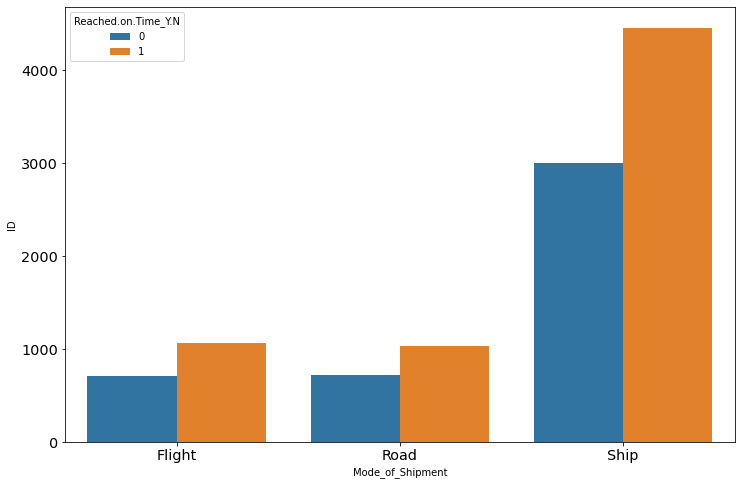

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(data = soal4_grp1, x = 'Mode_of_Shipment', y = 'ID', hue= 'Reached.on.Time_Y.N')

Pengiriman menggunakan kapal cenderung mengalami keterlambatan dalam pengiriman. Hal itu wajar dikarenakan pengiriman paling banyak dengan moda kapal. Dengan itu, perusahaan bisa lebih mengurangi pengiriman moda kapal dengan menggunakan moda pengiriman lainnya. Sehingga, meminimalisir penumpukan dan keterlambatan dalam pengiriman barang.

2. Pengiriman barang berdasarkan prioritas dan status pengiriman

In [ ]:
soal4_grp2 = df1.groupby(['Mode_of_Shipment', 'Product_importance','Reached.on.Time_Y.N'])['ID'].count().reset_index()
soal4_grp2

,Mode_of_Shipment,Product_importance,Reached.on.Time_Y.N,ID
0,Flight,high,0,68
1,Flight,high,1,95
2,Flight,low,0,336
3,Flight,low,1,502
4,Flight,medium,0,304
5,Flight,medium,1,472
6,Road,high,0,55
7,Road,high,1,103
8,Road,low,0,353
9,Road,low,1,504


3. hubungan berat dengan keterlambatan

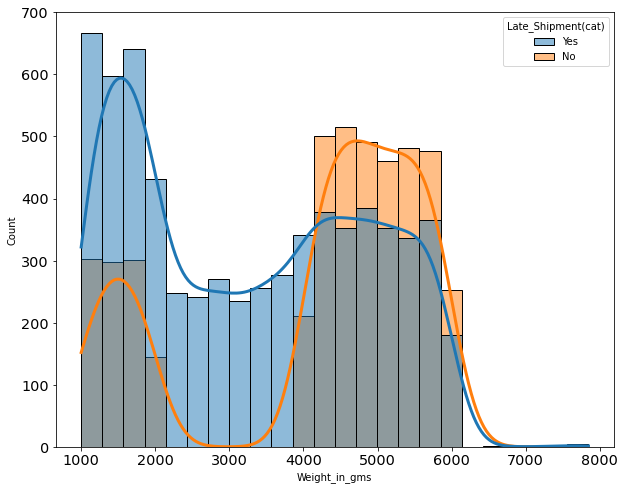

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(data=df, x='Weight_in_gms', hue='Late_Shipment(cat)', kde=True)

- Pengiriman barang dengan berat < 4000 gram cenderung telat, perlu digali lebih lanjut data pengiriman barang dengan berat <4000 gram dan 2000-4000 gram.

liat dari sisi customer coba

5. Merekomendasikan pengiriman berdasarkan berat barang
6. Memberikan diskon kepada customer dengan prior purchase lebih dari 3, gunakan diskon 5% 10% dan 15% agar diskon lebih menarik


# 5. Git (15 poin)
Upload project teman-teman di sebuah repository git. Berkolaborasilah di Git jika ada perubahan version dari waktu ke waktu.

A. Buat Repository Git

B. Upload file notebook atau file pengerjaan lainnya pada repository tersebut
Untuk file README, dapat merupakan summary insight yang telah didapatkan dari EDA.